In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [3]:
X

array([[-0.71239066],
       [-0.43714566],
       [-0.45375238],
       [ 0.95283061],
       [ 0.23785784],
       [ 0.86121137],
       [-0.24332625],
       [ 0.18494595],
       [-0.72099967],
       [-0.42989708],
       [ 2.01522083],
       [ 0.39724133],
       [ 0.20780005],
       [-0.23242587],
       [-0.76862702],
       [ 0.45315861],
       [ 0.63988397],
       [ 0.3595323 ],
       [-1.61510796],
       [ 1.74924179],
       [-0.78898902],
       [-0.51196509],
       [-0.92833523],
       [ 2.15038297],
       [-0.2073497 ],
       [-1.63909341],
       [-0.33861825],
       [-0.32212366],
       [-0.48137142],
       [-0.52316421],
       [ 0.72196506],
       [ 0.76591105],
       [ 0.45348104],
       [-1.26160595],
       [-2.18711527],
       [-1.18541881],
       [ 0.21745166],
       [ 1.33031692],
       [-1.08718159],
       [ 0.56226171],
       [-1.51284512],
       [-0.00238903],
       [-0.27813452],
       [ 0.45181234],
       [ 1.19070527],
       [ 0

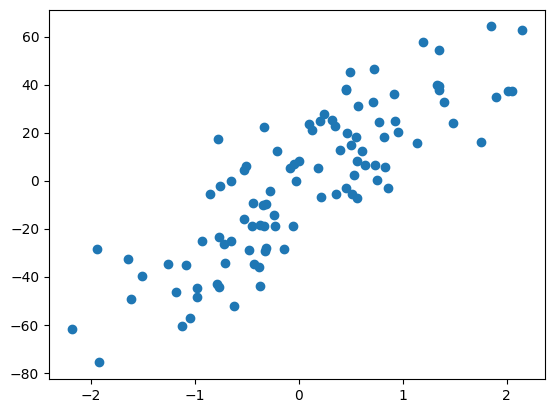

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.6375011587464419

In [7]:
m = 27.82

In [8]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=29.19
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            self.b = self.b
            loss_slope = -2 * np.sum(y- self.m*X.ravel() - self.b)
            self.b = self.b-(self.lr*loss_slope)
            print(loss_slope,self.b)

In [9]:
gd = GDRegressor(0.001,300)
gd.fit(X,y)

-23525.1419783106 -96.4748580216894
-18820.11358264848 -77.65474443904093
-15056.090866118784 -62.59865357292214
-12044.872692895024 -50.55378088002711
-9635.898154316017 -40.917882725711095
-7708.718523452817 -33.20916420225828
-6166.974818762253 -27.042189383496027
-4933.579855009803 -22.108609528486223
-3946.8638840078415 -18.16174564447838
-3157.4911072062723 -15.004254537272107
-2525.992885765018 -12.47826165150709
-2020.794308612015 -10.457467342895075
-1616.6354468896116 -8.840831896005463
-1293.3083575116898 -7.547523538493774
-1034.6466860093517 -6.512876852484422
-827.7173488074811 -5.685159503676941
-662.1738790459849 -5.022985624630956
-529.739103236788 -4.493246521394168
-423.79128258943047 -4.069455238804737
-339.0330260715442 -3.730422212733193
-271.22642085723544 -3.459195791875958
-216.98113668578833 -3.2422146551901694
-173.5849093486306 -3.068629745841539
-138.8679274789046 -2.929761818362634
-111.09434198312377 -2.8186674763795105
-88.87547358649888 -2.7297920027930

### Now we will calculate both m & b value!

In [11]:
class GDRegressor2:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            self.b = self.b
            loss_slope_m = -2 * np.sum((y- self.m*X.ravel() - self.b) * X.ravel())
            loss_slope_b = -2 * np.sum(y- self.m*X.ravel() - self.b)
            self.b = self.b-(self.lr*loss_slope_b)
            self.m = self.m-(self.lr*loss_slope_m)
        print(self.b,self.m)

In [12]:
gd = GDRegressor2(0.001,100)
gd.fit(X,y)

-2.2947448944994893 27.828091872608653


### Animtaion 

In [13]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

<IPython.core.display.Javascript object>


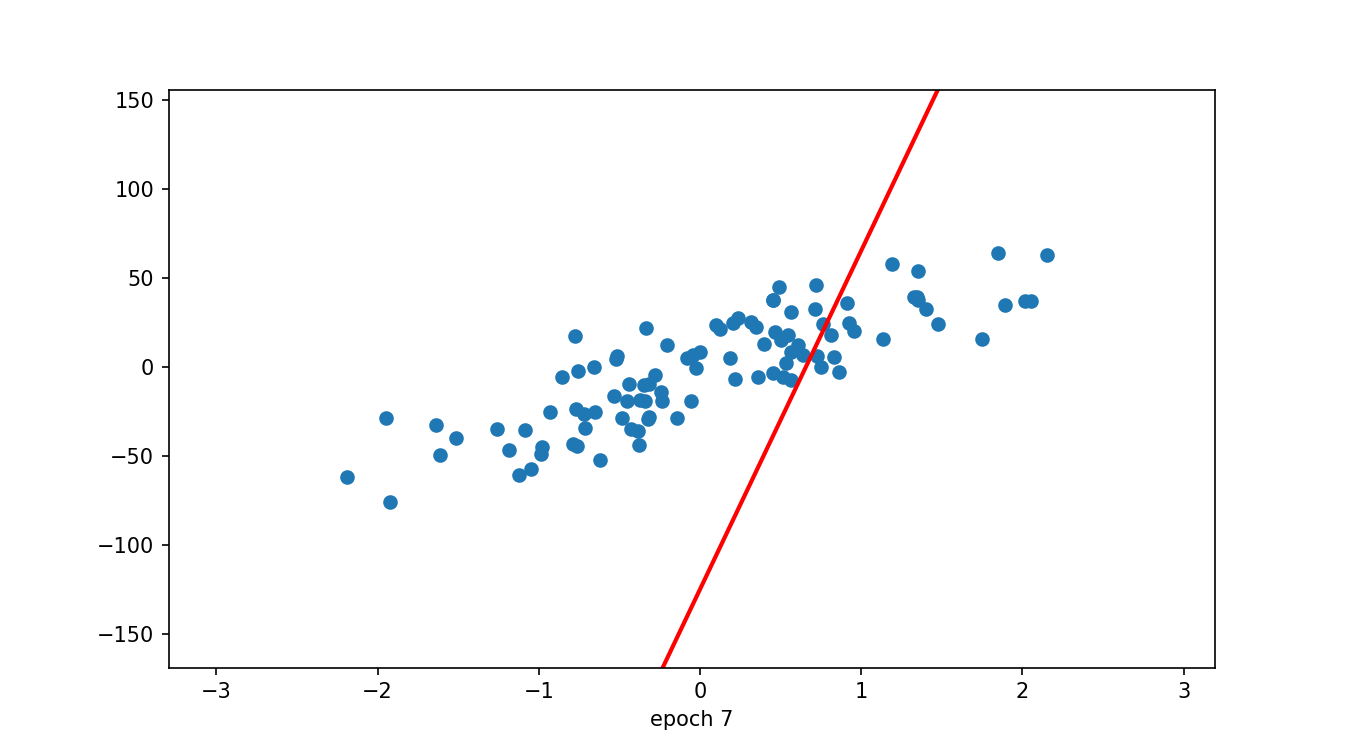

In [15]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)